<a href="https://colab.research.google.com/github/SouravSharma178/Banking-Application-ATM-/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #used to load the dataset
import numpy as np  #perform operations with arrays and matrices
import seaborn as sns #visualize the dataset
import matplotlib.pyplot as plt #visualize the dataset
import warnings
%matplotlib inline 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('new_car_sales.csv')

In [3]:
df.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Oldsmobile,Intrigue,38.554,NaN,Passenger,24.150,3.5,215.0,109.0,73.6,195.9,3.455,18.0,NaN,2011,86.272523
1,Toyota,Tacoma,84.087,9.575,Car,11.528,2.4,142.0,103.3,66.5,178.7,2.580,15.1,23.0,2011,55.297117
2,Volkswagen,GTI,5.596,13.760,Passenger,17.500,2.0,115.0,98.9,68.3,163.3,2.762,14.6,26.0,2011,47.946841
3,Nissan,Altima,88.094,11.295,Passenger,20.390,2.4,155.0,103.1,69.1,183.5,3.012,15.9,25.0,2011,63.313728
4,Buick,Regal,39.350,13.740,Passenger,25.300,3.8,240.0,109.0,72.7,196.2,3.543,17.5,23.0,2011,95.636703


In [4]:
#statistical info
df.describe()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
count,628.000000,487.000000,620.000000,624.000000,624.000000,624.00000,624.000000,624.000000,620.000000,624.000000,619.000000,628.000000,620.000000
mean,53.150734,18.032710,27.366187,3.057853,185.775641,107.46859,71.129968,187.296635,3.376042,17.943109,23.843296,2011.310510,76.971704
std,67.886966,11.394763,14.332235,1.042778,56.609878,7.62625,3.445874,13.396195,0.629970,3.881133,4.262389,0.659189,25.105753
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.60000,62.600000,149.400000,1.895000,10.300000,15.000000,2010.000000,23.276272
25%,14.114000,11.260000,17.890000,2.300000,148.000000,103.00000,68.400000,177.575000,2.967000,15.800000,21.000000,2011.000000,60.087967
50%,29.450000,14.180000,22.747000,3.000000,175.000000,107.00000,70.500000,187.800000,3.341000,17.200000,24.000000,2011.000000,71.934478
75%,68.411000,19.875000,31.965000,3.800000,215.000000,112.20000,73.400000,196.200000,3.821000,19.575000,26.000000,2012.000000,89.427820
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.70000,79.900000,224.500000,5.572000,32.000000,45.000000,2012.000000,188.144323


In [5]:
#data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            628 non-null    object 
 1   Model                   628 non-null    object 
 2   Sales_in_thousands      628 non-null    float64
 3   four_year_resale_value  487 non-null    float64
 4   Vehicle_type            628 non-null    object 
 5   Price_in_thousands      620 non-null    float64
 6   Engine_size             624 non-null    float64
 7   Horsepower              624 non-null    float64
 8   Wheelbase               624 non-null    float64
 9   Width                   624 non-null    float64
 10  Length                  624 non-null    float64
 11  Curb_weight             620 non-null    float64
 12  Fuel_capacity           624 non-null    float64
 13  Fuel_efficiency         619 non-null    float64
 14  Latest_Launch           628 non-null    in

In [6]:
#check unique values
df.apply(lambda x:len(x.unique()))

Manufacturer               30
Model                     156
Sales_in_thousands        157
four_year_resale_value    118
Vehicle_type                2
Price_in_thousands        153
Engine_size                32
Horsepower                 67
Wheelbase                  89
Width                      79
Length                    128
Curb_weight               148
Fuel_capacity              56
Fuel_efficiency            21
Latest_Launch               3
Power_perf_factor         155
dtype: int64

In [7]:
#check for null values
df.isnull().sum()

Manufacturer                0
Model                       0
Sales_in_thousands          0
four_year_resale_value    141
Vehicle_type                0
Price_in_thousands          8
Engine_size                 4
Horsepower                  4
Wheelbase                   4
Width                       4
Length                      4
Curb_weight                 8
Fuel_capacity               4
Fuel_efficiency             9
Latest_Launch               0
Power_perf_factor           8
dtype: int64

In [8]:
#check for categorical attributes
cat_col = []
for x in df.dtypes.index:
  if df.dtypes[x] == 'object':
    cat_col.append(x)
cat_col

['Manufacturer', 'Model', 'Vehicle_type']

In [9]:
#print the categorical columns
for col in cat_col:
  print(col)
  print(df[col].value_counts())
  print()

Manufacturer
Dodge         44
Ford          44
Toyota        37
Chevrolet     36
Mercedes-B    36
Nissan        29
Mitsubishi    28
Chrysler      28
Volkswagen    24
Volvo         24
Mercury       24
Pontiac       24
Lexus         24
Oldsmobile    21
Honda         20
Saturn        20
Cadillac      20
Buick         17
Acura         16
Plymouth      16
Porsche       12
Jeep          12
Lincoln       12
Audi          12
Hyundai       12
BMW           12
Saab           8
Subaru         8
Jaguar         4
Infiniti       4
Name: Manufacturer, dtype: int64

Model
Neon        8
Tacoma      5
Altima      5
Regal       5
S80         4
           ..
Accent      4
Forester    4
Corvette    4
Ranger      4
Intrigue    1
Name: Model, Length: 156, dtype: int64

Vehicle_type
Passenger    463
Car          165
Name: Vehicle_type, dtype: int64



In [10]:
#fill the missing values
fyrv_mean = df.pivot_table(values ='four_year_resale_value', index= 'Manufacturer')
fyrv_mean
#now we need to find out which row has the missing value and we will store it in a new variable
miss_fyrv = df['four_year_resale_value'].isnull()
miss_fyrv
#filling the missing values
for i,item in enumerate(df['Manufacturer']):
  if miss_fyrv[i]:
        if item in fyrv_mean:
            df['four_year_resale_value'][i] = fyrv_mean.loc[item]['four_year_resale_value'] #this will get the average price and assign it to the particular row
        else:
            df['four_year_resale_value'][i] = np.mean(df['four_year_resale_value'])
df['four_year_resale_value'].isnull().sum()            

0

In [11]:
Price_in_thousands_mean = df.pivot_table(values ='Price_in_thousands', index= 'Manufacturer')
Price_in_thousands_mean
miss_Price_in_thousands = df['Price_in_thousands'].isnull()
miss_Price_in_thousands
for i,item in enumerate(df['Manufacturer']):
  if miss_Price_in_thousands[i]:
        if item in Price_in_thousands_mean:
            df['Price_in_thousands'][i] = Price_in_thousands_mean.loc[item]['Price_in_thousands'] #this will get the average price and assign it to the particular row
        else:
            df['Price_in_thousands'][i] = np.mean(df['Price_in_thousands'])
df['Price_in_thousands'].isnull().sum()            

0

In [12]:
Engine_size_mean = df.pivot_table(values ='Engine_size', index= 'Manufacturer')
Engine_size_mean
miss_Engine_size  = df['Engine_size'].isnull()
miss_Engine_size 
for i,item in enumerate(df['Manufacturer']):
  if miss_Engine_size[i]:
        if item in Engine_size_mean:
            df['Engine_size'][i] = Engine_size_mean.loc[item]['Engine_size'] #this will get the average price and assign it to the particular row
        else:
            df['Engine_size'][i] = np.mean(df['Engine_size'])
df['Engine_size'].isnull().sum()            

0

In [13]:
Horsepower_mean = df.pivot_table(values ='Horsepower', index= 'Manufacturer')
Horsepower_mean
miss_Horsepower = df['Horsepower'].isnull()
miss_Horsepower
for i,item in enumerate(df['Manufacturer']):
  if miss_Horsepower[i]:
        if item in Horsepower_mean:
            df['Horsepower'][i] = Horsepower_mean.loc[item]['Horsepower'] #this will get the average price and assign it to the particular row
        else:
            df['Horsepower'][i] = np.mean(df['Horsepower'])
df['Horsepower'].isnull().sum()            

0

In [14]:
Wheelbase_mean = df.pivot_table(values ='Wheelbase', index= 'Manufacturer')
Wheelbase_mean

miss_Wheelbase  = df['Wheelbase'].isnull()
miss_Wheelbase 

for i,item in enumerate(df['Manufacturer']):
  if miss_Wheelbase[i]:
        if item in Wheelbase_mean:
            df['Wheelbase'][i] = Wheelbase_mean.loc[item]['Wheelbase'] #this will get the average price and assign it to the particular row
        else:
            df['Wheelbase'][i] = np.mean(df['Wheelbase'])

df['Wheelbase'].isnull().sum()

0

In [15]:
Width_mean = df.pivot_table(values ='Width', index= 'Manufacturer')
Width_mean

miss_Width  = df['Width'].isnull()
miss_Width 

for i,item in enumerate(df['Manufacturer']):
  if miss_Width[i]:
        if item in Width_mean:
            df['Width'][i] = Width_mean.loc[item]['Width'] #this will get the average price and assign it to the particular row
        else:
            df['Width'][i] = np.mean(df['Width'])

df['Width'].isnull().sum()

0

In [16]:
Length_mean = df.pivot_table(values ='Length', index= 'Manufacturer')
Length_mean

miss_Length  = df['Length'].isnull()
miss_Length

for i,item in enumerate(df['Manufacturer']):
  if miss_Length[i]:
        if item in Length_mean:
            df['Length'][i] = Length_mean.loc[item]['Length'] #this will get the average price and assign it to the particular row
        else:
            df['Length'][i] = np.mean(df['Length'])

df['Length'].isnull().sum()

0

In [17]:
Curb_weight_mean = df.pivot_table(values ='Curb_weight', index= 'Manufacturer')
Curb_weight_mean

miss_Curb_weight  = df['Curb_weight'].isnull()
miss_Curb_weight

for i,item in enumerate(df['Manufacturer']):
  if miss_Curb_weight[i]:
        if item in Curb_weight_mean:
            df['Curb_weight'][i] = Length_mean.loc[item]['Curb_weight'] #this will get the average price and assign it to the particular row
        else:
            df['Curb_weight'][i] = np.mean(df['Curb_weight'])

df['Curb_weight'].isnull().sum()

0

In [18]:
Fuel_capacity_mean = df.pivot_table(values ='Fuel_capacity', index= 'Manufacturer')
Fuel_capacity_mean

miss_Fuel_capacity  = df['Fuel_capacity'].isnull()
miss_Fuel_capacity

for i,item in enumerate(df['Manufacturer']):
  if miss_Fuel_capacity[i]:
        if item in Fuel_capacity_mean:
            df['Fuel_capacity'][i] = Fuel_capacity_mean.loc[item]['Fuel_capacity'] #this will get the average price and assign it to the particular row
        else:
            df['Fuel_capacity'][i] = np.mean(df['Fuel_capacity'])

df['Fuel_capacity'].isnull().sum()

0

In [19]:
Fuel_efficiency_mean = df.pivot_table(values ='Fuel_efficiency', index= 'Manufacturer')
Fuel_efficiency_mean

miss_Fuel_efficiency  = df['Fuel_efficiency'].isnull()
miss_Fuel_efficiency

for i,item in enumerate(df['Manufacturer']):
  if miss_Fuel_efficiency[i]:
        if item in Fuel_efficiency_mean:
            df['Fuel_efficiency'][i] = Fuel_efficiency_mean.loc[item]['Fuel_efficiency'] #this will get the average price and assign it to the particular row
        else:
            df['Fuel_efficiency'][i] = np.mean(df['Fuel_efficiency'])

df['Fuel_efficiency'].isnull().sum()

0

In [20]:
Power_perf_factor_mean = df.pivot_table(values ='Power_perf_factor', index= 'Manufacturer')
Fuel_efficiency_mean

miss_Power_perf_factor  = df['Power_perf_factor'].isnull()
miss_Power_perf_factor

for i,item in enumerate(df['Manufacturer']):
  if miss_Power_perf_factor[i]:
        if item in Fuel_efficiency_mean:
            df['Power_perf_factor'][i] = Fuel_efficiency_mean.loc[item]['Power_perf_factor'] #this will get the average price and assign it to the particular row
        else:
            df['Power_perf_factor'][i] = np.mean(df['Power_perf_factor'])

df['Power_perf_factor'].isnull().sum()

0

In [21]:
sum(df['Sales_in_thousands']==0)

0

In [22]:
#Creation of new attributes
df['New_Item_Type'] = df['Vehicle_type'].apply(lambda x: x[:2])
df['New_Item_Type']

0      Pa
1      Ca
2      Pa
3      Pa
4      Pa
       ..
623    Pa
624    Pa
625    Pa
626    Pa
627    Pa
Name: New_Item_Type, Length: 628, dtype: object

In [23]:
df['New_Item_Type'] = df['New_Item_Type'].map({'Pa':'passenger', 'Ca':'car'})
df['New_Item_Type'].value_counts()

passenger    463
car          165
Name: New_Item_Type, dtype: int64

In [24]:
df['Launch_Years'] = 2022 - df['Latest_Launch']
df['Launch_Years']

0      11
1      11
2      11
3      11
4      11
       ..
623    11
624    11
625    11
626    11
627    11
Name: Launch_Years, Length: 628, dtype: int64

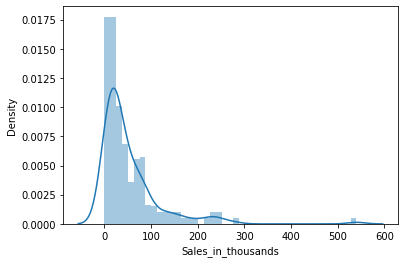

In [25]:
sns.distplot(df['Sales_in_thousands'])

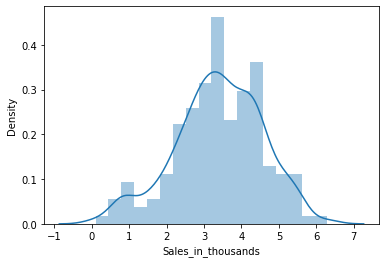

In [26]:
# log transformation
df['Sales_in_thousands'] = np.log(1+df['Sales_in_thousands'])
sns.distplot(df['Sales_in_thousands'])

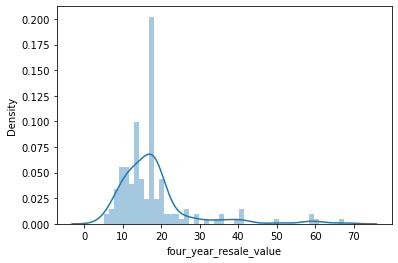

In [27]:
sns.distplot(df['four_year_resale_value'])

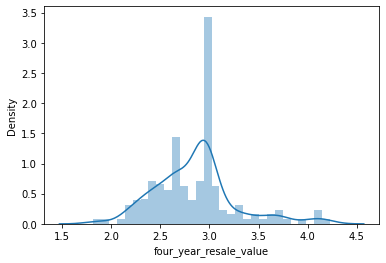

In [28]:
# log transformation
df['four_year_resale_value'] = np.log(1+df['four_year_resale_value'])
sns.distplot(df['four_year_resale_value'])

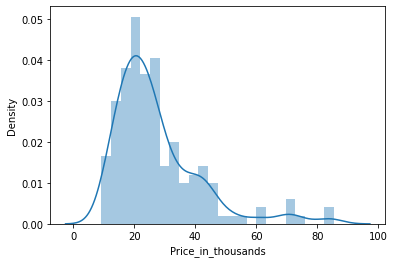

In [29]:
sns.distplot(df['Price_in_thousands'])

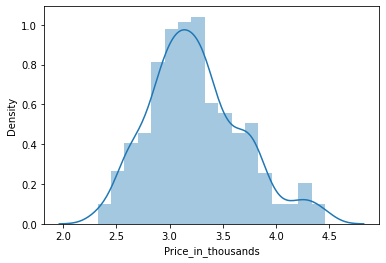

In [30]:
# log transformation
df['Price_in_thousands'] = np.log(1+df['Price_in_thousands'])
sns.distplot(df['Price_in_thousands'])

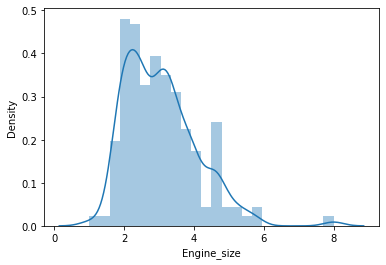

In [31]:
sns.distplot(df['Engine_size'])

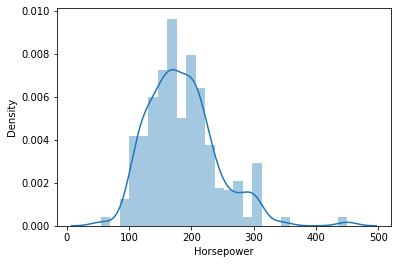

In [32]:
sns.distplot(df['Horsepower'])

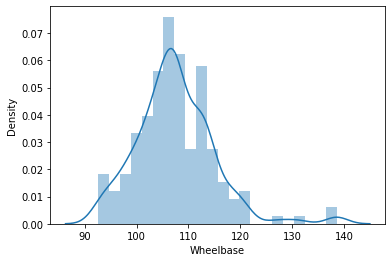

In [33]:
sns.distplot(df['Wheelbase'])

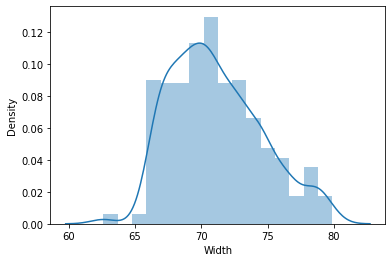

In [34]:
sns.distplot(df['Width'])

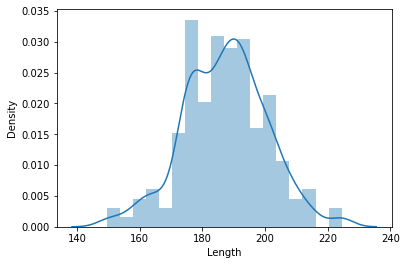

In [35]:
sns.distplot(df['Length'])

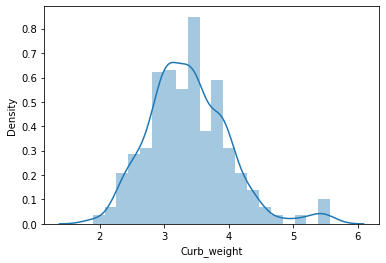

In [36]:
sns.distplot(df['Curb_weight'])

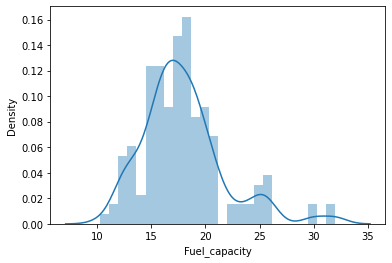

In [37]:
sns.distplot(df['Fuel_capacity'])

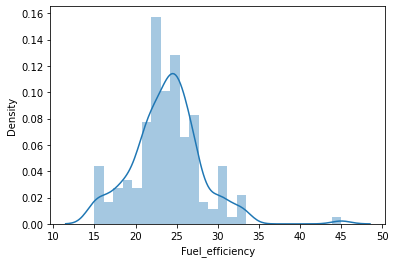

In [38]:
sns.distplot(df['Fuel_efficiency'])

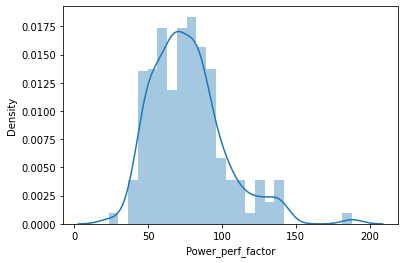

In [39]:
sns.distplot(df['Power_perf_factor'])

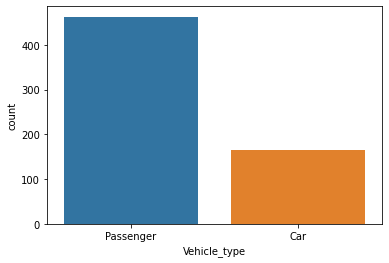

In [40]:
#plotting for categorical attributes
sns.countplot(df["Vehicle_type"])

[Text(0, 0, 'Oldsmobile'),
 Text(0, 0, 'Toyota'),
 Text(0, 0, 'Volkswagen'),
 Text(0, 0, 'Nissan'),
 Text(0, 0, 'Buick'),
 Text(0, 0, 'Dodge'),
 Text(0, 0, 'Acura'),
 Text(0, 0, 'BMW'),
 Text(0, 0, 'Saturn'),
 Text(0, 0, 'Mercedes-B'),
 Text(0, 0, 'Chrysler'),
 Text(0, 0, 'Subaru'),
 Text(0, 0, 'Audi'),
 Text(0, 0, 'Jeep'),
 Text(0, 0, 'Porsche'),
 Text(0, 0, 'Chevrolet'),
 Text(0, 0, 'Saab'),
 Text(0, 0, 'Lincoln'),
 Text(0, 0, 'Jaguar'),
 Text(0, 0, 'Lexus'),
 Text(0, 0, 'Honda'),
 Text(0, 0, 'Hyundai'),
 Text(0, 0, 'Ford'),
 Text(0, 0, 'Mitsubishi'),
 Text(0, 0, 'Pontiac'),
 Text(0, 0, 'Mercury'),
 Text(0, 0, 'Plymouth'),
 Text(0, 0, 'Volvo'),
 Text(0, 0, 'Cadillac'),
 Text(0, 0, 'Infiniti')]

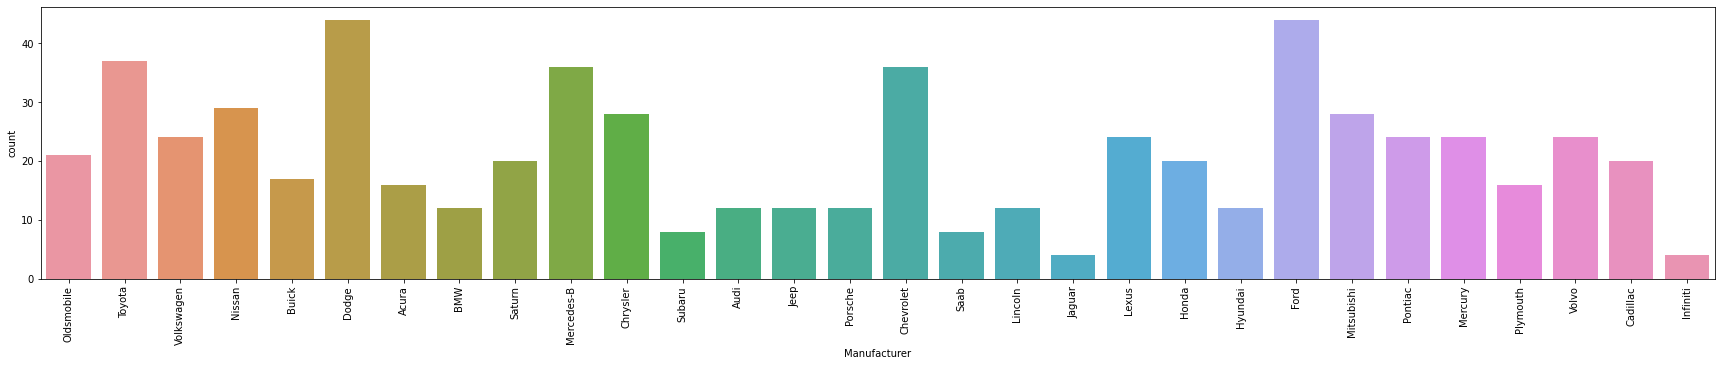

In [66]:
plt.figure(figsize=(30,5))
chart = sns.countplot(df["Manufacturer"])
chart.set_xticklabels(labels=l, rotation=90)

[Text(0, 0, 'Oldsmobile'),
 Text(0, 0, 'Toyota'),
 Text(0, 0, 'Volkswagen'),
 Text(0, 0, 'Nissan'),
 Text(0, 0, 'Buick'),
 Text(0, 0, 'Dodge'),
 Text(0, 0, 'Acura'),
 Text(0, 0, 'BMW'),
 Text(0, 0, 'Saturn'),
 Text(0, 0, 'Mercedes-B'),
 Text(0, 0, 'Chrysler'),
 Text(0, 0, 'Subaru'),
 Text(0, 0, 'Audi'),
 Text(0, 0, 'Jeep'),
 Text(0, 0, 'Porsche'),
 Text(0, 0, 'Chevrolet'),
 Text(0, 0, 'Saab'),
 Text(0, 0, 'Lincoln'),
 Text(0, 0, 'Jaguar'),
 Text(0, 0, 'Lexus'),
 Text(0, 0, 'Honda'),
 Text(0, 0, 'Hyundai'),
 Text(0, 0, 'Ford'),
 Text(0, 0, 'Mitsubishi'),
 Text(0, 0, 'Pontiac'),
 Text(0, 0, 'Mercury'),
 Text(0, 0, 'Plymouth'),
 Text(0, 0, 'Volvo'),
 Text(0, 0, 'Cadillac'),
 Text(0, 0, 'Infiniti')]

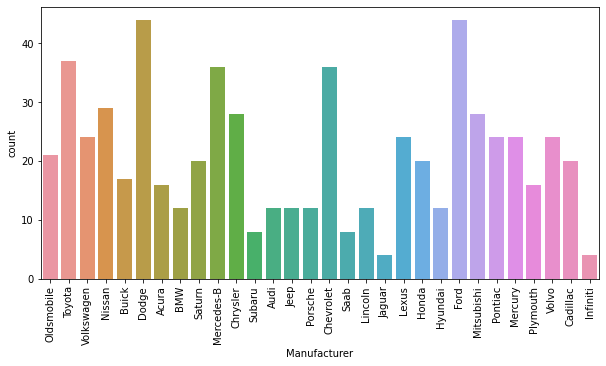

In [68]:
l = list(df['Manufacturer'].unique())
plt.figure(figsize=(10,5))
chart = sns.countplot(df["Manufacturer"])
chart.set_xticklabels(labels=l, rotation=90)

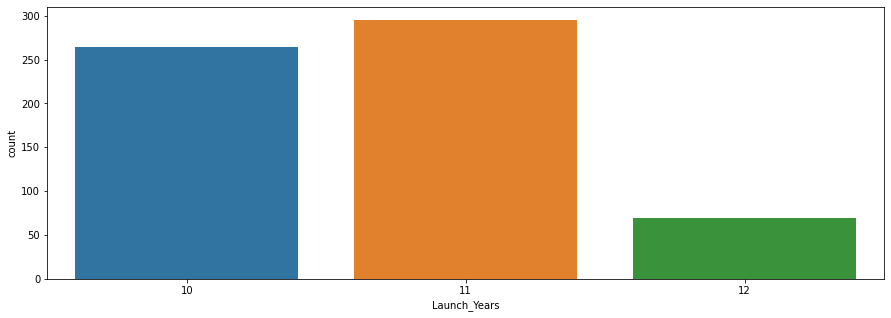

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(df["Launch_Years"])

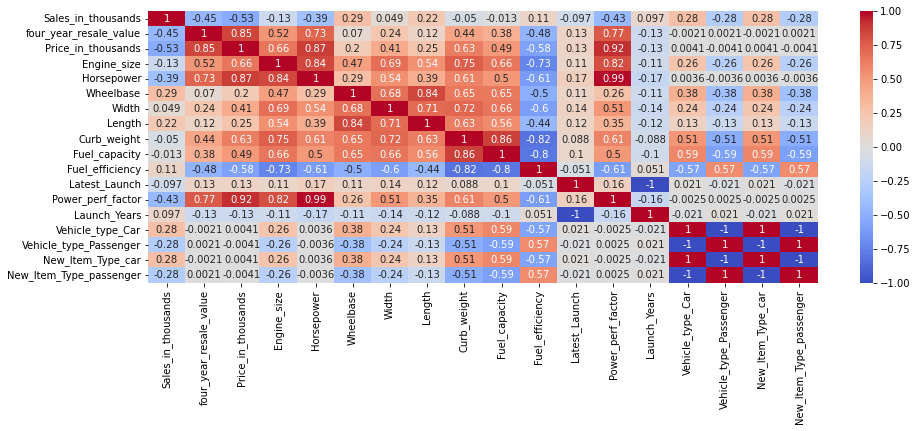

In [73]:
plt.figure(figsize=(15,5))
corr = df.corr()
chart = sns.heatmap(corr, annot=True, cmap='coolwarm')


In [45]:
df = pd.get_dummies(df, columns=['Vehicle_type', 'New_Item_Type'])
df.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Launch_Years,Vehicle_type_Car,Vehicle_type_Passenger,New_Item_Type_car,New_Item_Type_passenger
0,Oldsmobile,Intrigue,3.677667,2.946159,3.224858,3.5,215.0,109.0,73.6,195.9,3.455,18.0,23.843296,2011,86.272523,11,0,1,0,1
1,Toyota,Tacoma,4.443674,2.358493,2.527966,2.4,142.0,103.3,66.5,178.7,2.580,15.1,23.000000,2011,55.297117,11,1,0,1,0
2,Volkswagen,GTI,1.886463,2.691921,2.917771,2.0,115.0,98.9,68.3,163.3,2.762,14.6,26.000000,2011,47.946841,11,0,1,0,1
3,Nissan,Altima,4.489692,2.509193,3.062924,2.4,155.0,103.1,69.1,183.5,3.012,15.9,25.000000,2011,63.313728,11,0,1,0,1
4,Buick,Regal,3.697591,2.690565,3.269569,3.8,240.0,109.0,72.7,196.2,3.543,17.5,23.000000,2011,95.636703,11,0,1,0,1


In [49]:
X = df.drop(columns=['Manufacturer','Model','Latest_Launch','Sales_in_thousands'])
y = df['Sales_in_thousands']

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

Model Report
MSE: 0.6791751403033338
CV Score: 0.8370524723851765


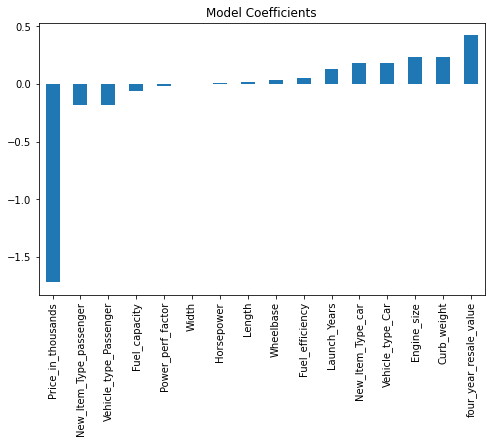

In [65]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
plt.figure(figsize=(8,5))
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.8062708511440355
CV Score: 0.856925370295046


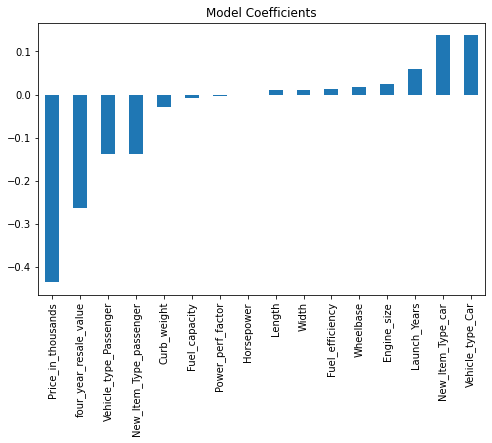

In [63]:
model = Ridge(normalize=True)
train(model, X, y)
plt.figure(figsize=(8,5))
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.8855246237199276
CV Score: 0.9324542322453919


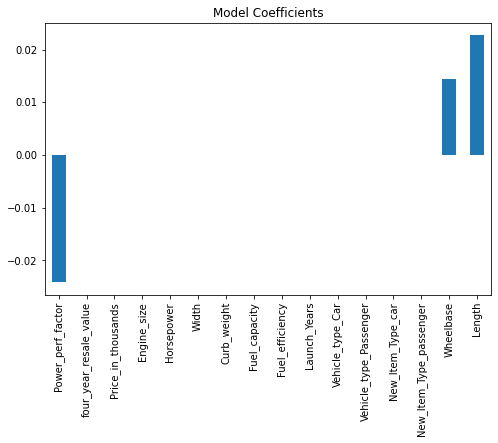

In [64]:
model = Lasso()
train(model, X, y)
plt.figure(figsize=(8,5))
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.0
CV Score: 1.7110384828327974


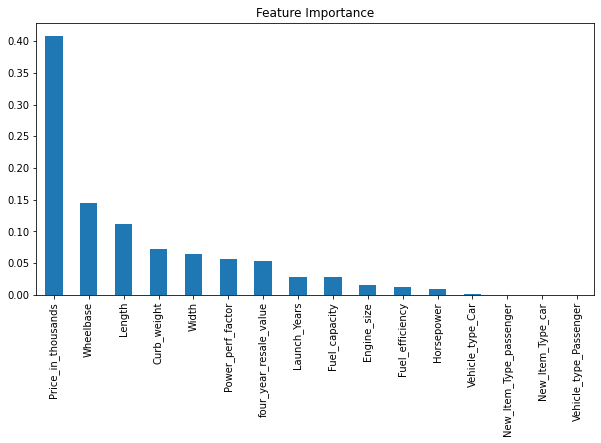

In [58]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
plt.figure(figsize=(10,5))
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 2.9789843991979195e-29
CV Score: 1.0393660367236564


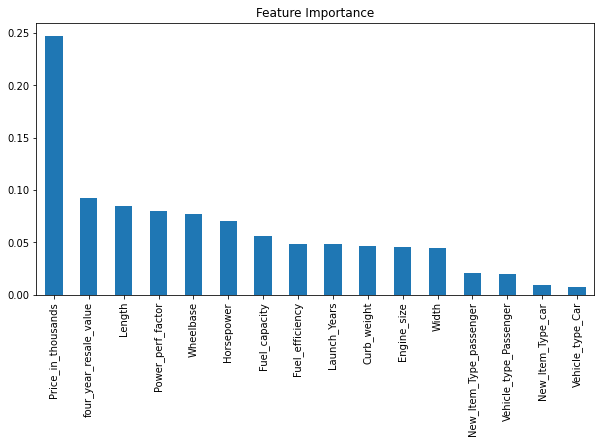

In [61]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
plt.figure(figsize=(10,5))
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")